# Resumen y explicación del proceso realizado en EDA_SantaIsabel.ipynb
Este notebook realiza un análisis exploratorio de datos (EDA) sobre los productos de Santa Isabel 2022. El proceso está ordenado y comentado en las siguientes etapas:

**1. Importación de datos y librerías**

**2. Inspección inicial y limpieza**
- Se revisa la estructura del DataFrame con `.info()` y `.head()`.
- Se detectan y visualizan los valores faltantes con un heatmap.
- Se reemplazan los valores 0.0 en las columnas de precios por NaN para evitar sesgos en el análisis.


**3. Análisis de precios**
- Se generan histogramas y boxplots para visualizar la distribución de precios.
- Se calcula el promedio de precios por categoría y por grupos de productos (alcohol, carne, abarrotes, vegetales, lácteos, congelados).


**4. Análisis categórico**
- Se cuenta el número de categorías únicas en la variable `categoria2`.
- Se visualiza la frecuencia de productos por categoría con gráficos de barras.


**5. Cálculo de variación de precios**
- Se calcula la diferencia entre el precio más alto y el más bajo (`Rango variacion`).
- Se calcula la variación proporcional respecto al precio alto (`Rango proporcion`).


**6. Visualización de variaciones**
- Se grafican los productos con mayor rango de variación proporcional, tanto para el total como para cada categoría.


## Importación

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv(r'C:\Users\hp\Desktop\GIT HUB\REPOSITORIOS\SantaIsabel_2022\DATA\result.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4468 entries, 0 to 4467
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         4468 non-null   object 
 1   brand         4468 non-null   object 
 2   normal_price  4468 non-null   float64
 3   low_price     4468 non-null   float64
 4   high_price    4468 non-null   float64
 5   oferta        4468 non-null   int64  
 6   categoria1    4468 non-null   object 
 7   categoria2    4468 non-null   object 
 8   datetime      4468 non-null   object 
 9   Atributos     4468 non-null   object 
 10  sin_stock     4468 non-null   int64  
 11  page          4468 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 419.0+ KB


## Detección de data faltante

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
#  Detectar valores faltantes
print("Valores faltantes - Variables:")
print(df.isnull().sum())


Valores faltantes - Variables:
title           0
brand           0
normal_price    0
low_price       0
high_price      0
oferta          0
categoria1      0
categoria2      0
datetime        0
Atributos       0
sin_stock       0
page            0
dtype: int64



Mapa de calor de valores faltantes:


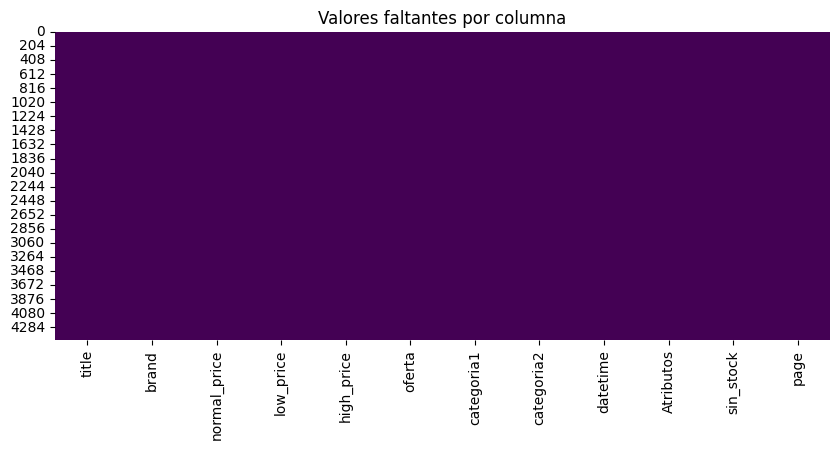

In [36]:
# Visualizarlos con heatmap
print("\nMapa de calor de valores faltantes:")
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Valores faltantes por columna")
plt.show()

In [37]:
df.head()

,title,brand,normal_price,low_price,high_price,oferta,categoria1,categoria2,datetime,Atributos,sin_stock,page
0,Pasta dental Ultra Blanco 3 un. 90 g c/u,Colgate,0.0,2590.0,3249.0,1,supermercados,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,1
1,Pasta dental triple 3 un. 90 g,Pepsodent,0.0,2790.0,2979.0,1,supermercados,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,1
2,Jabón líquido Dermo Care avena doypack 750 ml,Simond'S,1549.0,0.0,0.0,0,supermercados,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,1
3,Jabón líquido original 700 ml,Dove,0.0,2659.0,3549.0,1,supermercados,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,1
4,Pasta dental Xtra Whitening 3 un. 90 g,Pepsodent,0.0,2135.0,2979.0,1,supermercados,belleza-y-cuidado-personal,2022-07-16 22:11:26.364649,1 un,1,1


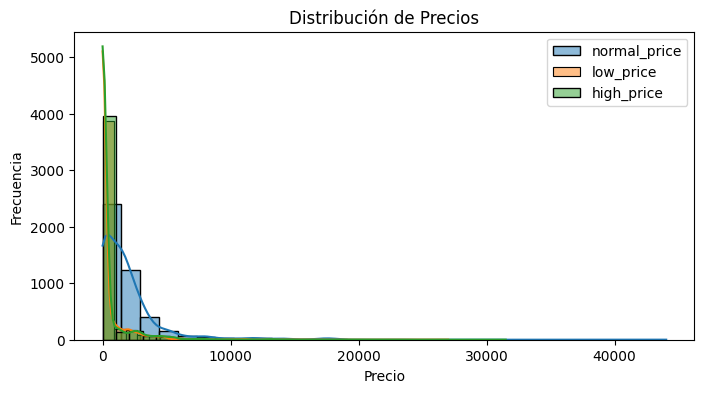

In [38]:
#Variables que deseo evaluar
precios = ['normal_price', 'low_price','high_price']

#Histograma de precios
plt.figure(figsize=(8, 4))
for precio in precios:
    sns.histplot(df[precio], kde=True, label=precio, bins=30, alpha=0.5)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [39]:
# Los datos estan alterados debido a los valores 0.0 
# Reemplazar valores 0.0 por NaN en las columnas de precios
import numpy as np
precios = ['normal_price', 'low_price', 'high_price']
df[precios] = df[precios].replace(0.0, np.nan)
df[precios].head()

,normal_price,low_price,high_price
0,NaN,2590.0,3249.0
1,NaN,2790.0,2979.0
2,1549.0,NaN,NaN
3,NaN,2659.0,3549.0
4,NaN,2135.0,2979.0


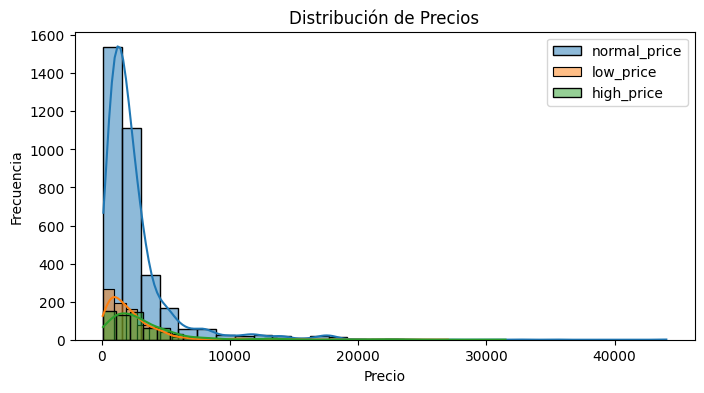

In [40]:

#Histograma de precios
plt.figure(figsize=(8, 4))
for precio in precios:
    sns.histplot(df[precio], kde=True, label=precio, bins=30, alpha=0.5)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


Text(0, 0.5, 'Precio')

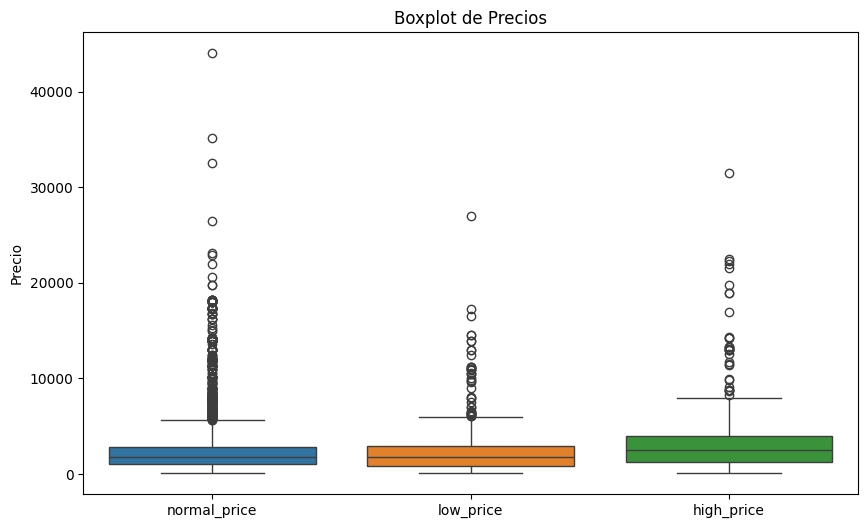

In [41]:
# Boxplot de precios
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[precios])
plt.title('Boxplot de Precios')
plt.ylabel('Precio')

In [42]:
# Ver cuántas categorías únicas contiene la variable 'categoria2'
num_categorias = df['categoria2'].nunique()
print(f"La variable 'categoria2' contiene {num_categorias} categorías únicas.")
print(df['categoria2'].unique())

La variable 'categoria2' contiene 26 categorías únicas.
['belleza-y-cuidado-personal' 'vinos-cervezas-y-licores' 'congelados'
 'desayuno-y-dulces' 'lacteos' 'postres' 'mantequillas-y-margarinas'
 'leches' 'frutas' 'verduras' 'frutos-secos-y-semillas' 'vacuno' 'cerdo'
 'pavo' 'pollo' 'conservas' 'harina-y-complementos' 'aderezos-y-salsas'
 'pastas-y-salsas' 'arroz-y-legumbres' 'aceites-sal-y-condimentos'
 'coctel' 'instantaneos-y-sopas' 'reposteria' 'comidas-preparadas'
 'pescaderia']


In [46]:
#Selecciono las categorías de interés
alcohol = ['vinos-cervezas-y-licores']
carne = ['vacuno', 'cerdo','pavo', 'pollo']
abarrotes =  ['pastas-y-salsas', 'arroz-y-legumbres']
vegetales = ['frutas','verduras']
lacteos = ['lacteos','leches']
congelados = ['congelados']

supermercado = alcohol + carne + abarrotes + vegetales + lacteos + congelados


In [72]:
# Calcular el promedio de precios de supermercado
df_supermercado = df[df['categoria2'].isin(supermercado)]
print(f"Total productos supermercado: {len(df_supermercado)}")
promedios = df_supermercado[['low_price', 'normal_price', 'high_price']].mean()
print('Promedio de precios supermercado:', promedios)




Total productos supermercado: 1960
Promedio de precios supermercado: low_price       2954.145729
normal_price    3037.025136
high_price      4415.183607
dtype: float64


Total productos ['vinos-cervezas-y-licores']: 4468
Promedio de ['vinos-cervezas-y-licores'] low_price: 4628.37
Promedio de ['vinos-cervezas-y-licores'] normal_price: 5678.81
Promedio de ['vinos-cervezas-y-licores'] high_price: 6088.01

 Grafica de promedio de precios de: ['vinos-cervezas-y-licores']


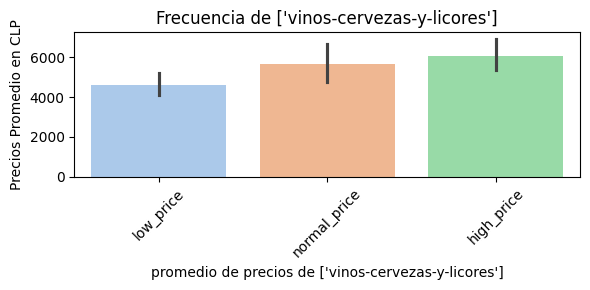



Total productos ['vacuno', 'cerdo', 'pavo', 'pollo']: 4468
Promedio de ['vacuno', 'cerdo', 'pavo', 'pollo'] low_price: 8079.82
Promedio de ['vacuno', 'cerdo', 'pavo', 'pollo'] normal_price: 8695.54
Promedio de ['vacuno', 'cerdo', 'pavo', 'pollo'] high_price: 10018.0

 Grafica de promedio de precios de: ['vacuno', 'cerdo', 'pavo', 'pollo']


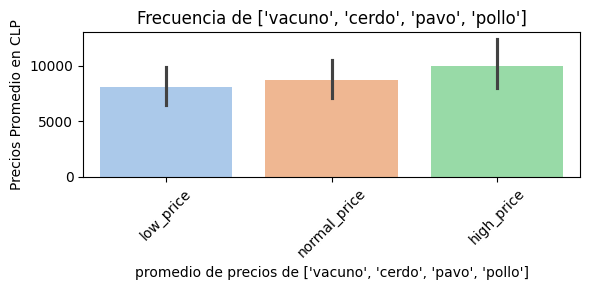



Total productos ['pastas-y-salsas', 'arroz-y-legumbres']: 4468
Promedio de ['pastas-y-salsas', 'arroz-y-legumbres'] low_price: 951.92
Promedio de ['pastas-y-salsas', 'arroz-y-legumbres'] normal_price: 1646.48
Promedio de ['pastas-y-salsas', 'arroz-y-legumbres'] high_price: 1119.48

 Grafica de promedio de precios de: ['pastas-y-salsas', 'arroz-y-legumbres']


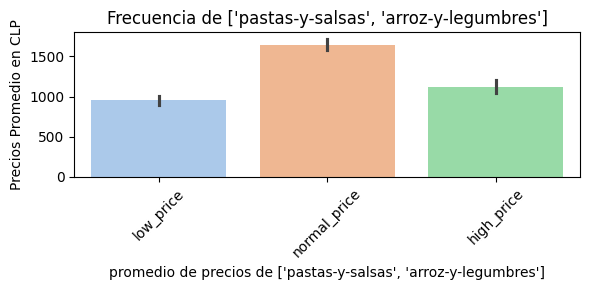



Total productos ['frutas', 'verduras']: 4468
Promedio de ['frutas', 'verduras'] low_price: nan
Promedio de ['frutas', 'verduras'] normal_price: 1522.26
Promedio de ['frutas', 'verduras'] high_price: nan

 Grafica de promedio de precios de: ['frutas', 'verduras']


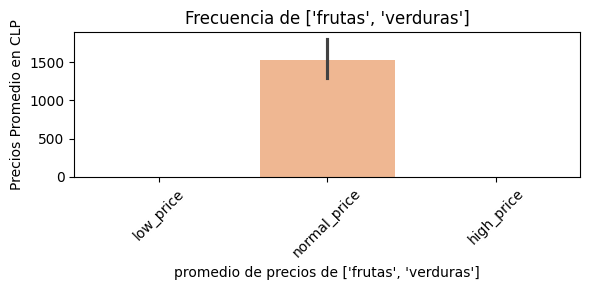



Total productos ['lacteos', 'leches']: 4468
Promedio de ['lacteos', 'leches'] low_price: 1244.41
Promedio de ['lacteos', 'leches'] normal_price: 3678.79
Promedio de ['lacteos', 'leches'] high_price: 4281.29

 Grafica de promedio de precios de: ['lacteos', 'leches']


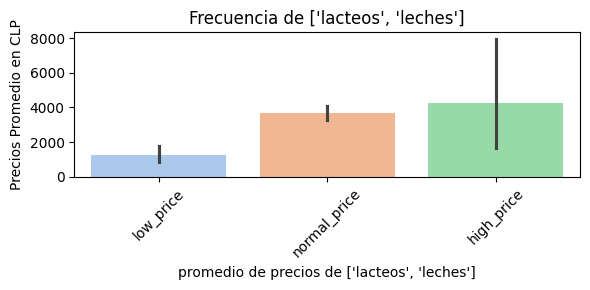



Total productos ['congelados']: 4468
Promedio de ['congelados'] low_price: 3175.56
Promedio de ['congelados'] normal_price: 3022.22
Promedio de ['congelados'] high_price: 3681.44

 Grafica de promedio de precios de: ['congelados']


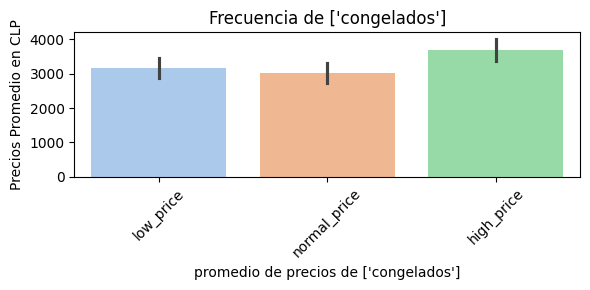

In [114]:
#Para visualizar la variación de precios según productos seleccionados
for i in supermercado:

    df_temp = df[df['categoria2'].isin(i)]
    df_temp = df_temp[['low_price', 'normal_price', 'high_price']]
    promedios = df_temp[['low_price', 'normal_price', 'high_price']].mean().round(2)
    print(f"Total productos {i}: {len(df)}")
    print(f'Promedio de {i} low_price:', promedios['low_price'])
    print(f'Promedio de {i} normal_price:', promedios['normal_price'])
    print(f'Promedio de {i} high_price:', promedios['high_price'])

    print(f"\n Grafica de promedio de precios de: {i}")

    plt.figure(figsize=(6, 3))
    sns.barplot(data=df_temp,
                  palette='pastel', legend=False)
    plt.title(f'Frecuencia de {i}')
    plt.xlabel(f"promedio de precios de {i}")
    plt.ylabel('Precios Promedio en CLP')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("\n")


 Conteo de productos disponibles: categoria2
categoria2
conservas                     480
lacteos                       449
aderezos-y-salsas             408
pastas-y-salsas               378
aceites-sal-y-condimentos     348
arroz-y-legumbres             328
coctel                        241
desayuno-y-dulces             241
congelados                    241
vinos-cervezas-y-licores      240
belleza-y-cuidado-personal    240
leches                        158
reposteria                    125
harina-y-complementos         108
pescaderia                     84
instantaneos-y-sopas           69
verduras                       64
postres                        48
mantequillas-y-margarinas      47
comidas-preparadas             46
vacuno                         31
cerdo                          27
frutos-secos-y-semillas        23
frutas                         19
pollo                          18
pavo                            7
Name: count, dtype: int64


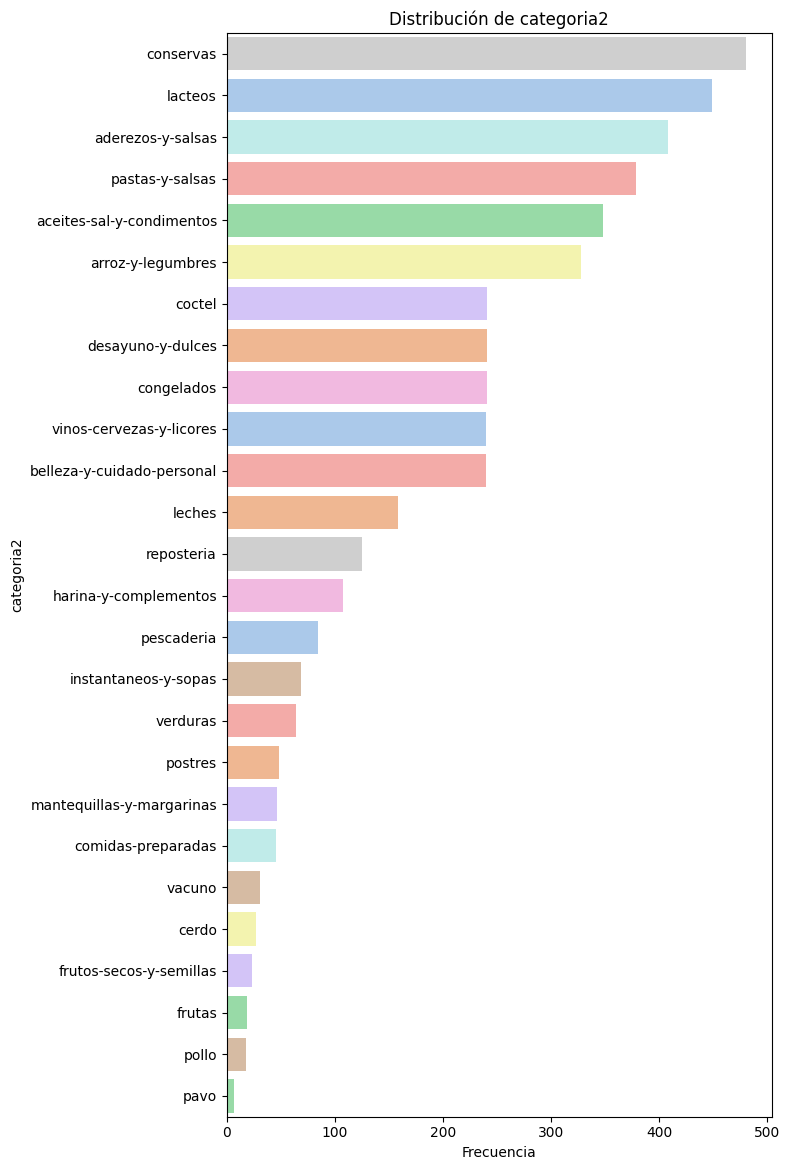

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['categoria2']:
    print(f"\n Conteo de productos disponibles: {col}")
    print(df[col].value_counts())    

    plt.figure(figsize=(8, 4 + len(df[col].unique()) * 0.3))  # Altura dinámica
    sns.countplot(data=df, y=col, hue=col,
                  order=df[col].value_counts().index,
                  palette='pastel', legend=False)
    plt.title(f'Distribución de {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


# Calcular variación de precios, según productos

In [124]:
df
df['Rango variacion'] = df['high_price'] - df['low_price']
df['Rango variacion'] = df['Rango variacion'].round(2)

df['Rango proporcion'] = (df['Rango variacion'] / df['high_price']) * 100

In [132]:
df = df.sort_values(by='Rango proporcion', ascending=False)
df[['title','brand','categoria2', 'normal_price', 'low_price', 'high_price', 'Rango variacion', 'Rango proporcion']].head(20)

,title,brand,categoria2,normal_price,low_price,high_price,Rango variacion,Rango proporcion
256,Pack 6 un. Cerveza lata 470 cc,Royal Guard,vinos-cervezas-y-licores,NaN,3690.0,6820.0,3130.0,45.894428
240,Pack 24 un. Cerveza lager 5.2° 330 cc,Stella Artois,vinos-cervezas-y-licores,NaN,12490.0,21990.0,9500.0,43.201455
243,Pack 6 un. Cerveza Lager lata 354 cc,Budweiser,vinos-cervezas-y-licores,NaN,2990.0,5150.0,2160.0,41.941748
336,Caja 24 un. cerveza lager botella 330 cc c/u,Heineken,vinos-cervezas-y-licores,NaN,12990.0,22270.0,9280.0,41.670409
464,Espumante Viña Francisco de Aguirre Brut 12° 7...,Vfa,vinos-cervezas-y-licores,NaN,2990.0,4990.0,2000.0,40.080160
922,Chocolate Bon o Bon Leche 105 g,Arcor,desayuno-y-dulces,NaN,863.0,1439.0,576.0,40.027797
846,Chocolate Bon o Bon Leche 120 g,Arcor,desayuno-y-dulces,NaN,899.0,1499.0,600.0,40.026684
854,Cereal Chocapic 720g,Chocapic,desayuno-y-dulces,NaN,2699.0,4499.0,1800.0,40.008891
262,Pack 6 un. Cerveza cero Radler 350 cc,Cristal,vinos-cervezas-y-licores,NaN,2790.0,4640.0,1850.0,39.870690
249,Pack 6 un. Cerveza Golden Lager lata 473 cc,Cusqueña,vinos-cervezas-y-licores,NaN,3490.0,5790.0,2300.0,39.723661


C:\Users\hp\AppData\Local\Temp\ipykernel_13288\1735266414.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


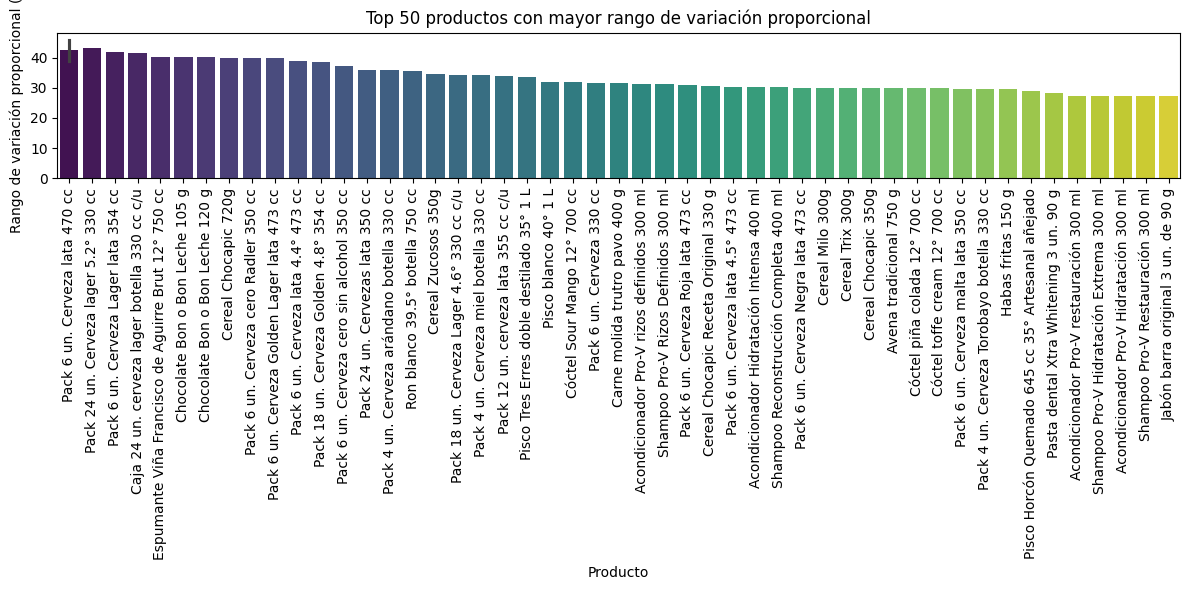

In [143]:
# Gráfico de los rangos de variación proporcional, ordenados de mayor a menor
cantidad = 50
plt.figure(figsize=(12, 6))
df_sorted = df.sort_values(by='Rango proporcion', ascending=False)
sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')
plt.xticks(rotation=90)
plt.title(f'Top {cantidad} productos con mayor rango de variación proporcional')
plt.xlabel('Producto')
plt.ylabel('Rango de variación proporcional (%)')
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


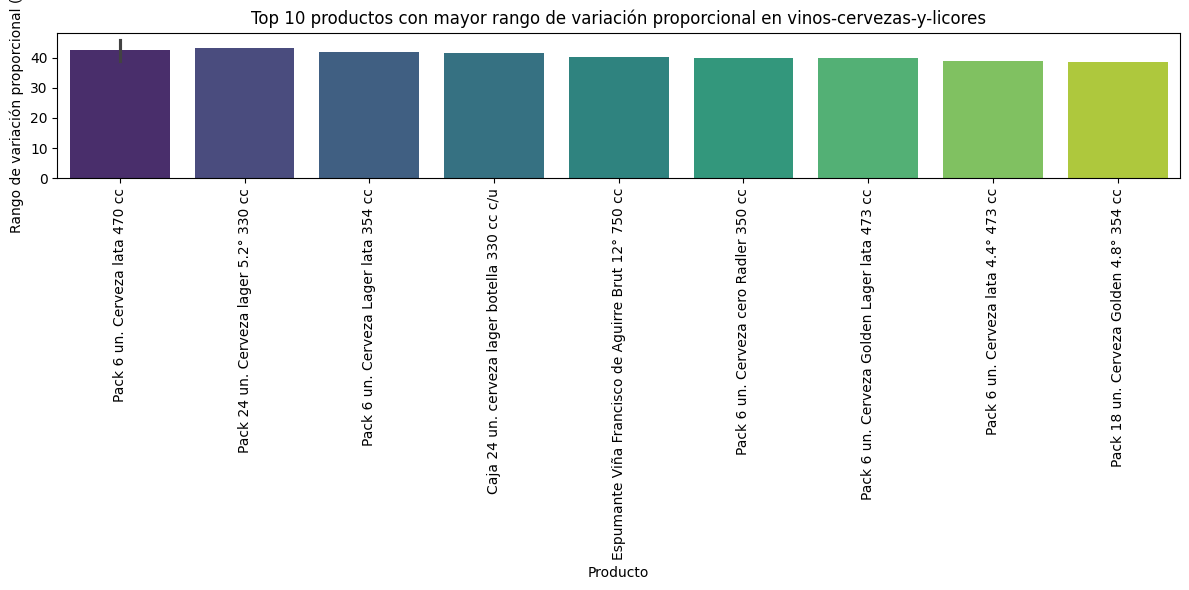

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


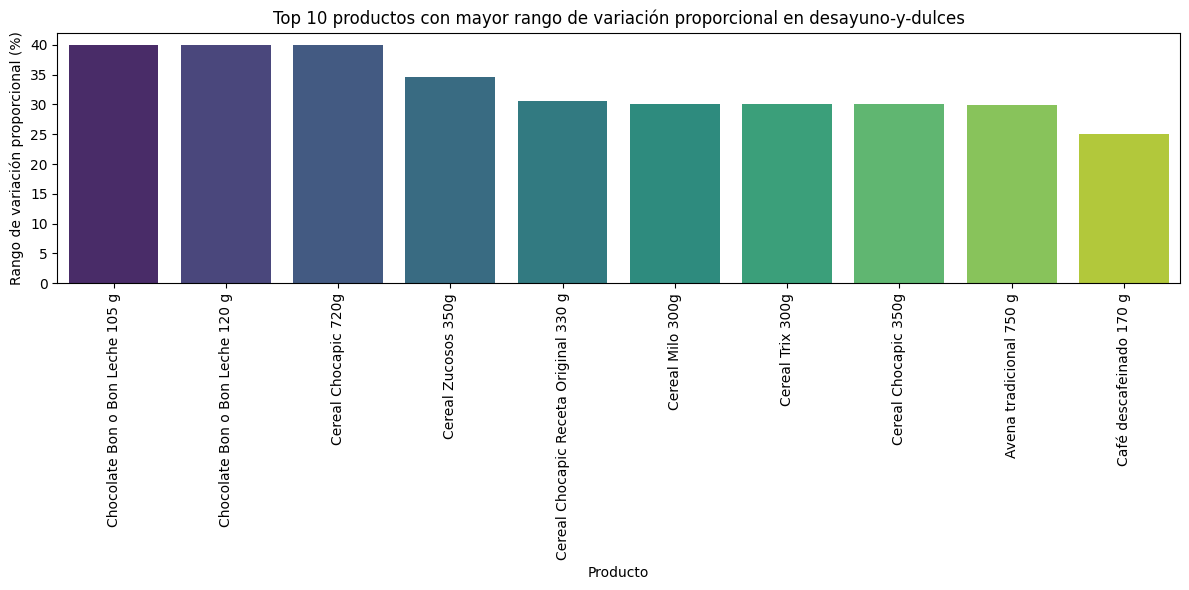

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


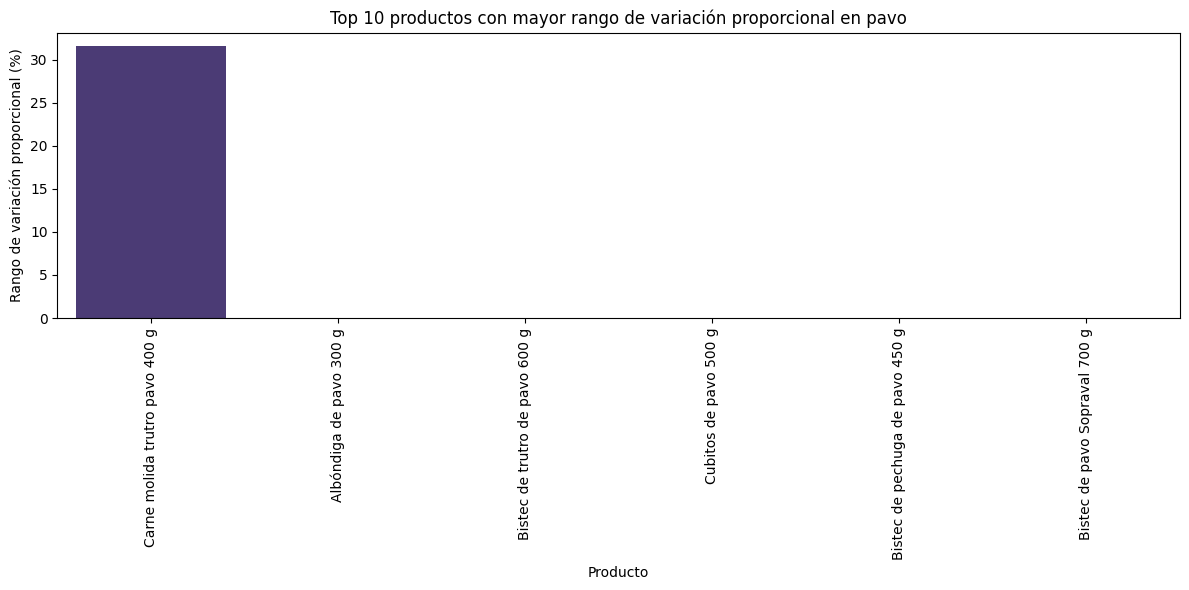

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


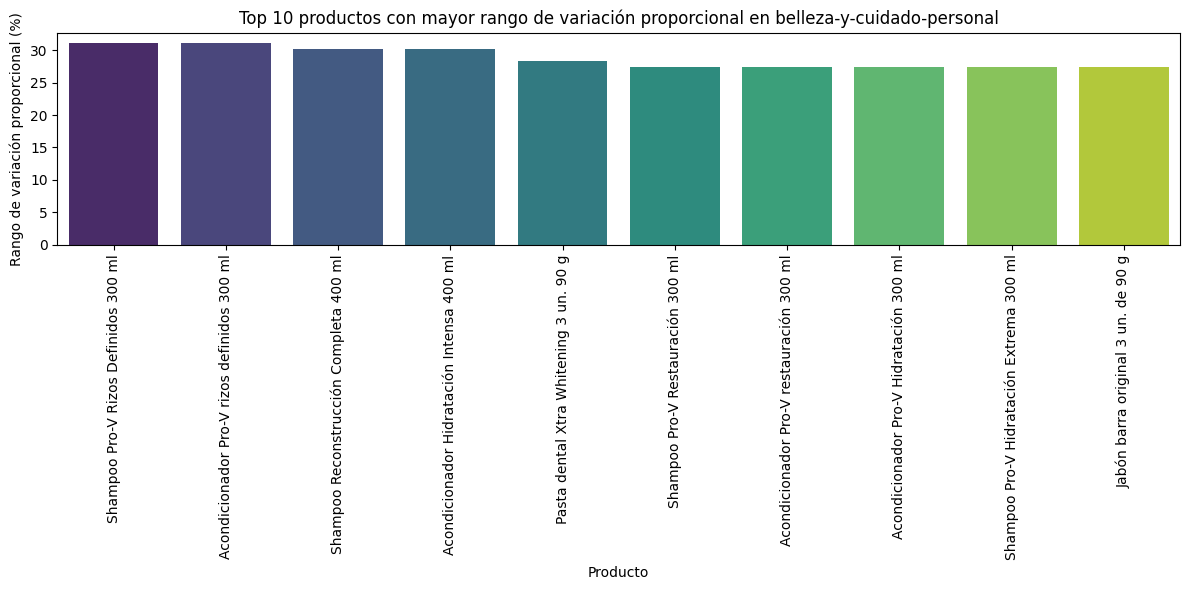

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


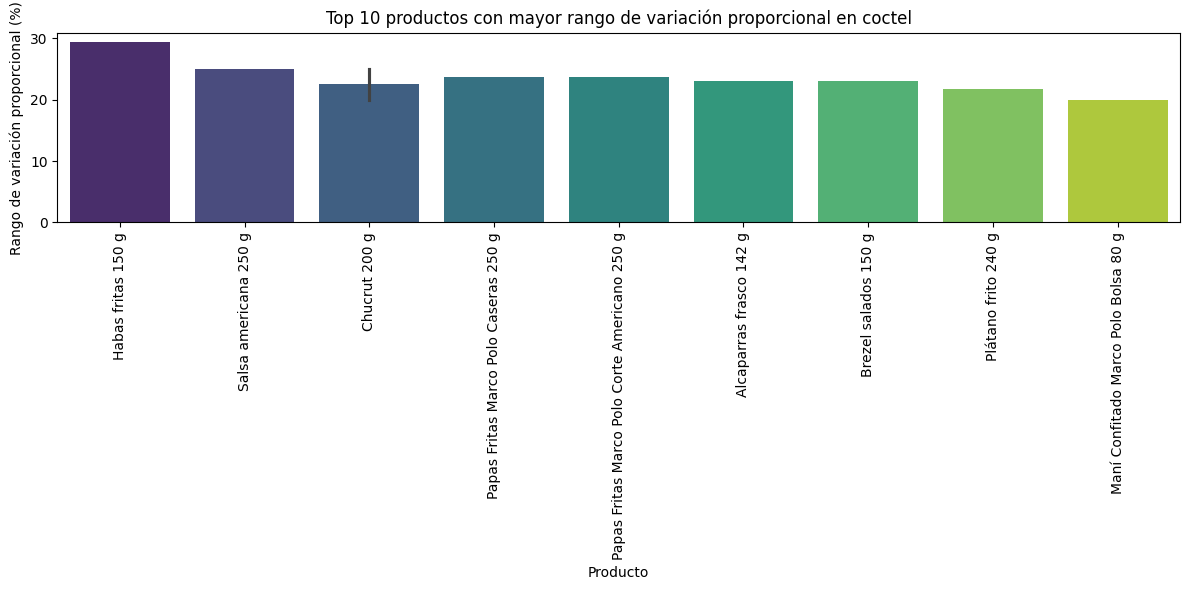

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


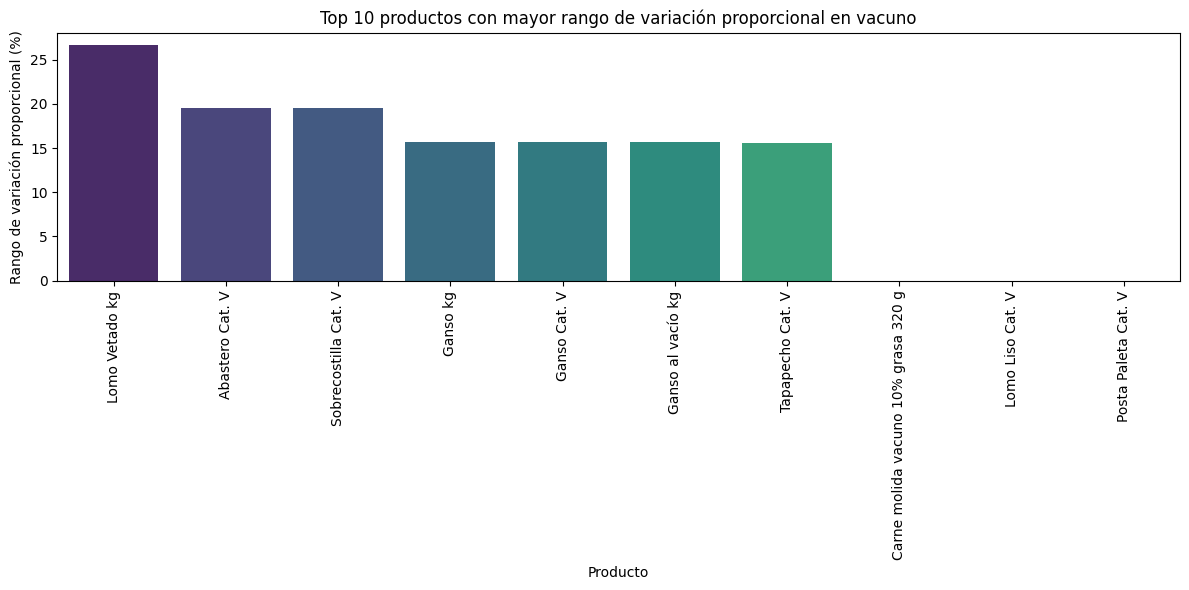

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


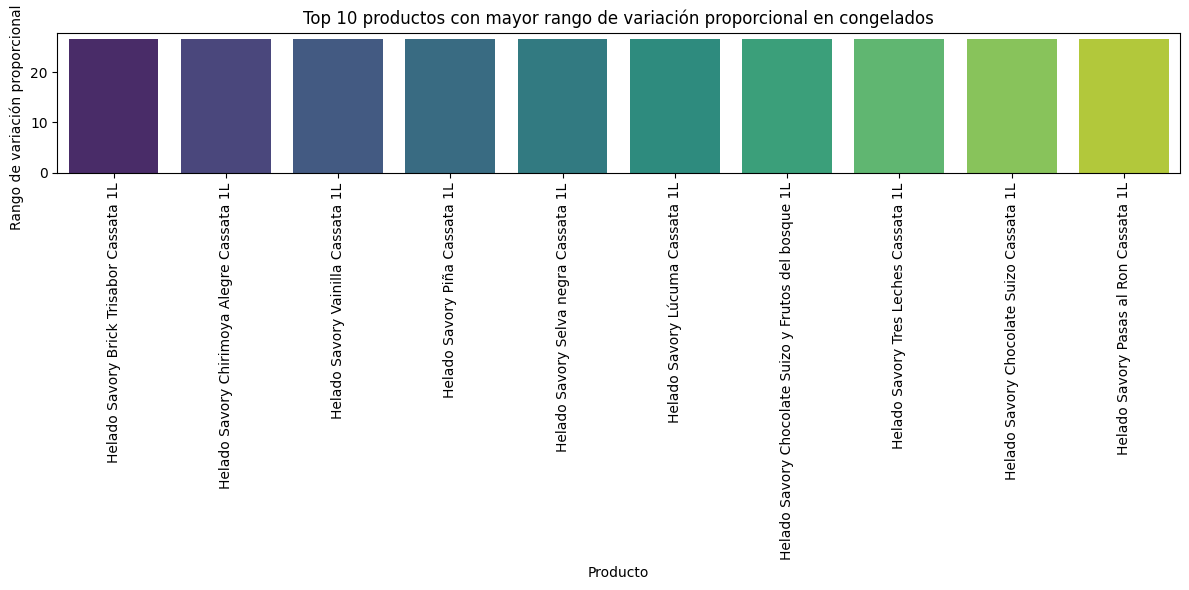

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


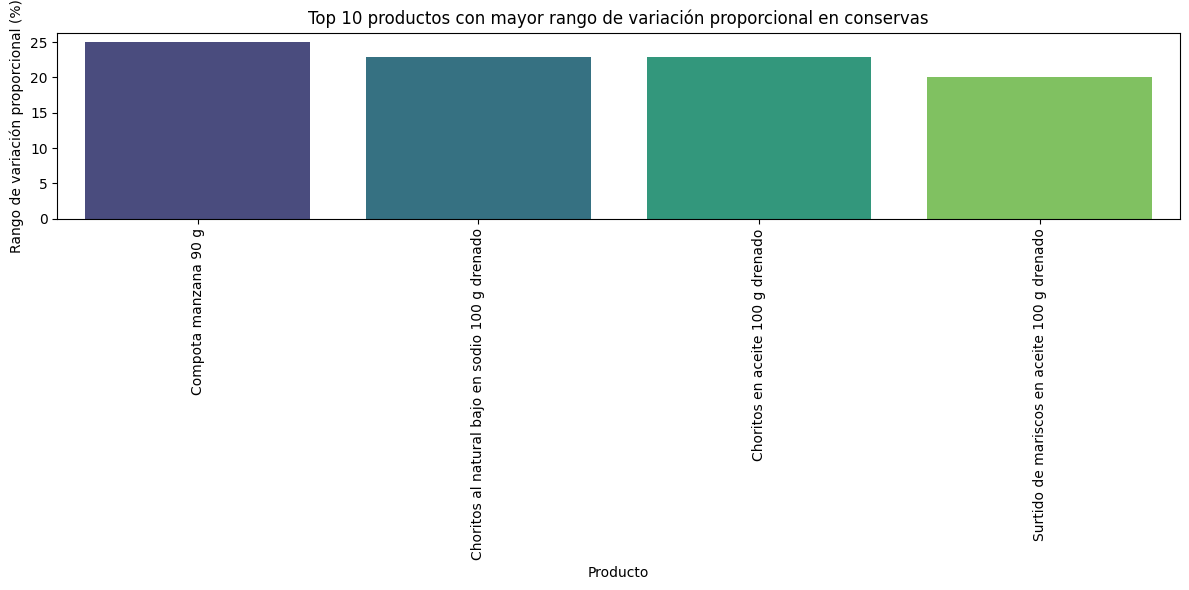

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


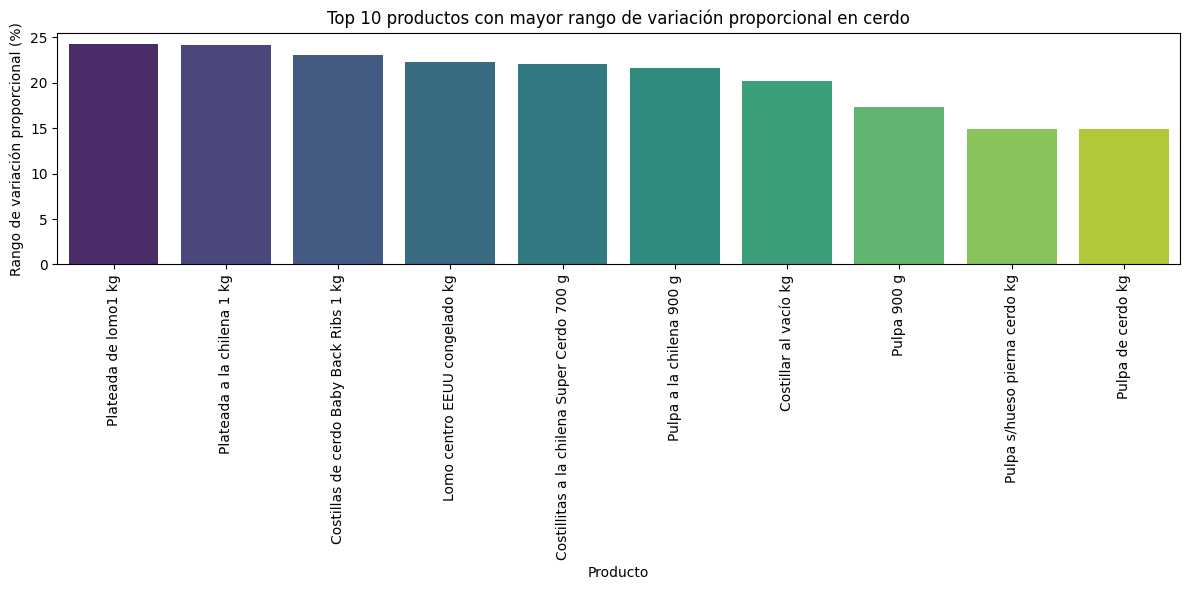

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


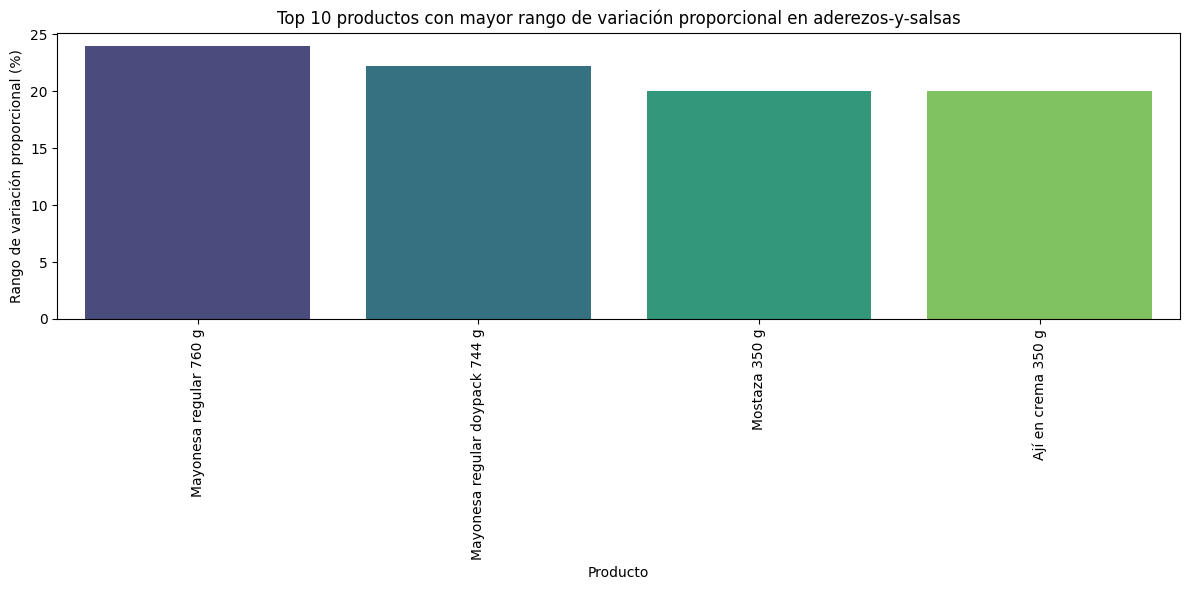

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


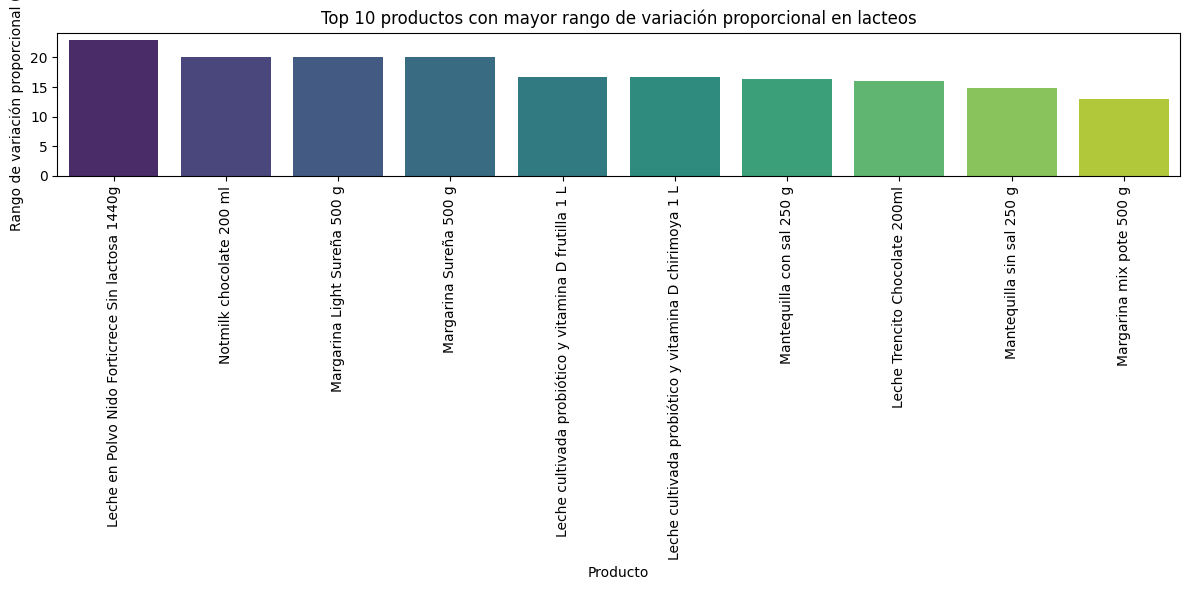

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


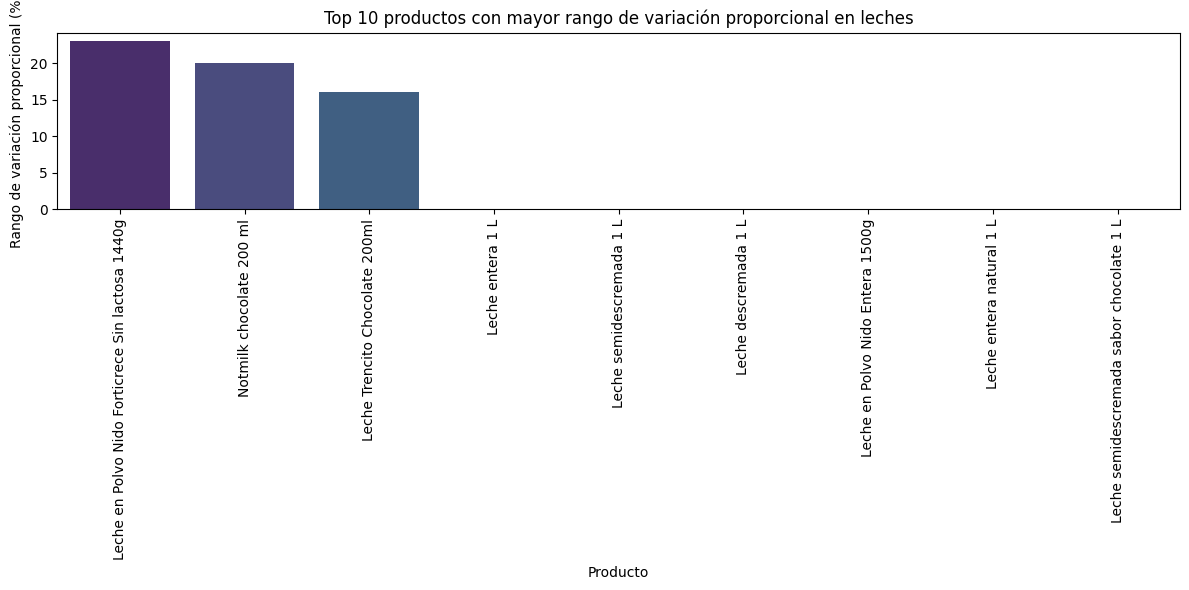

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


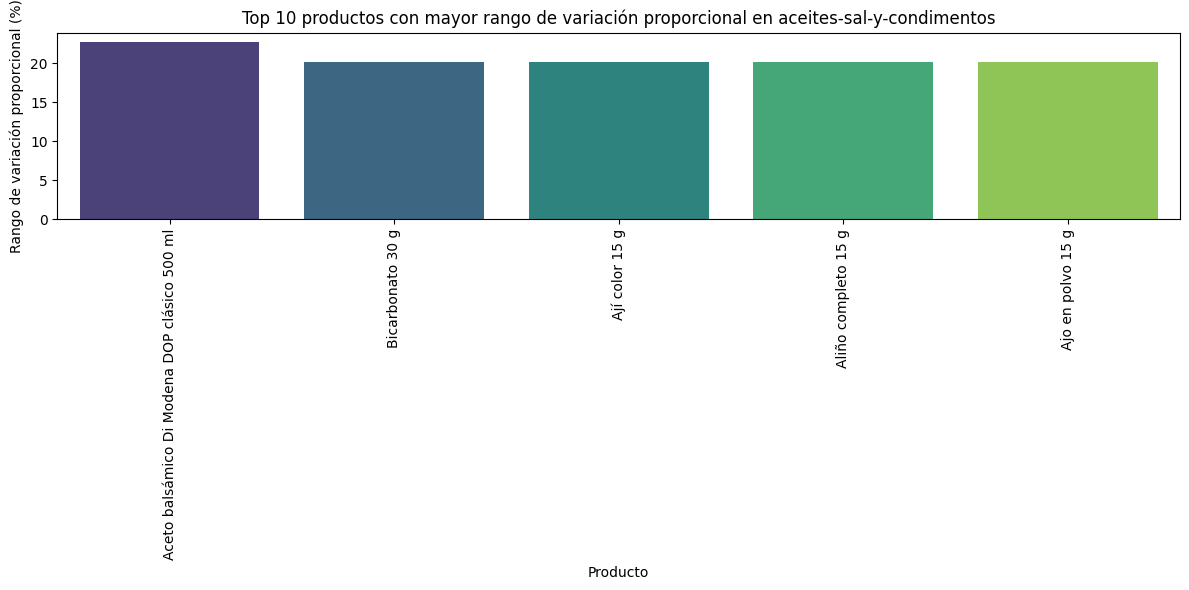

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


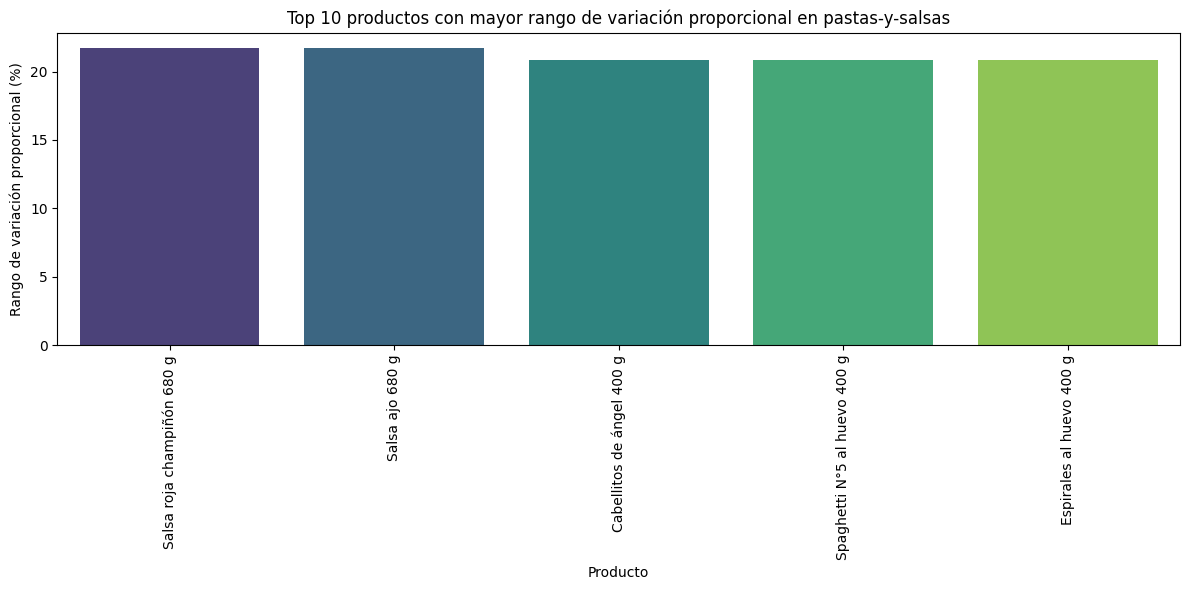

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


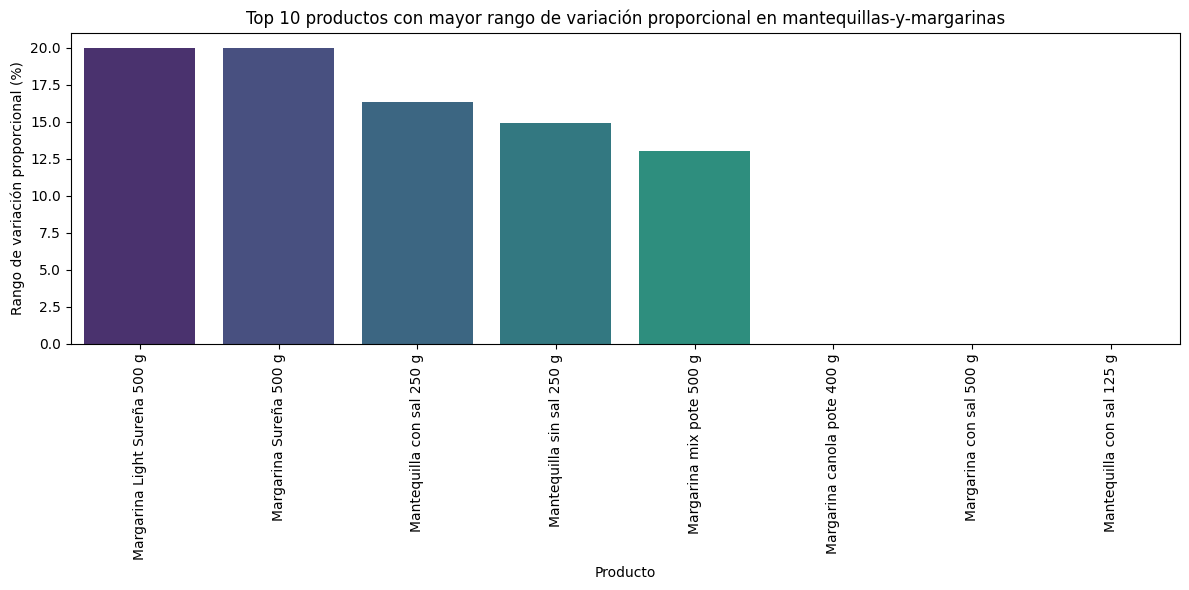

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


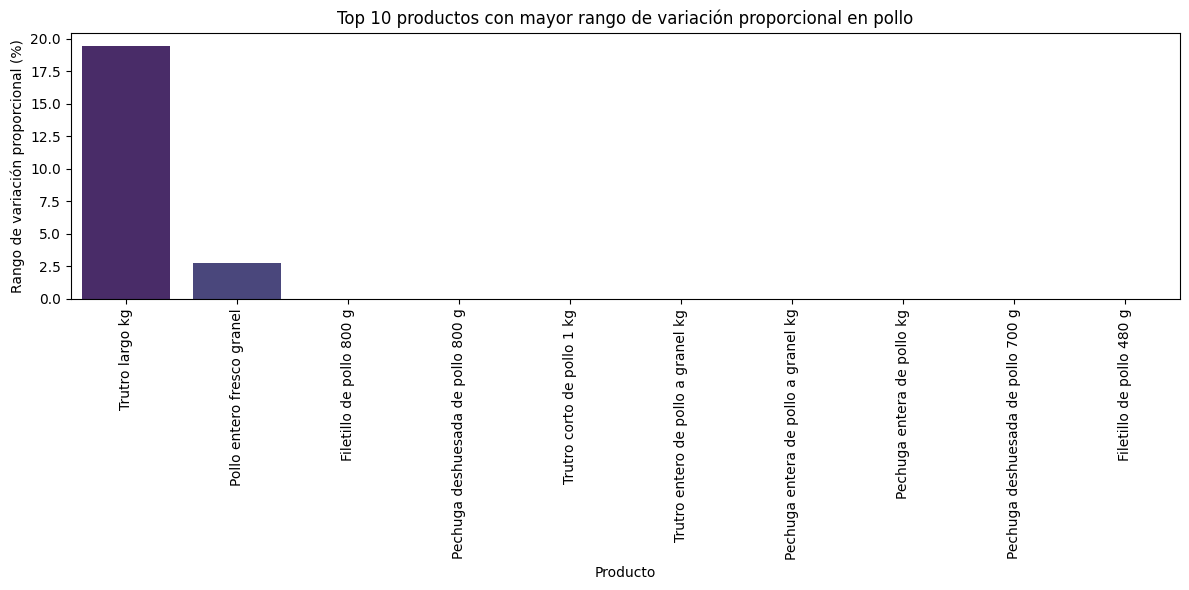

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


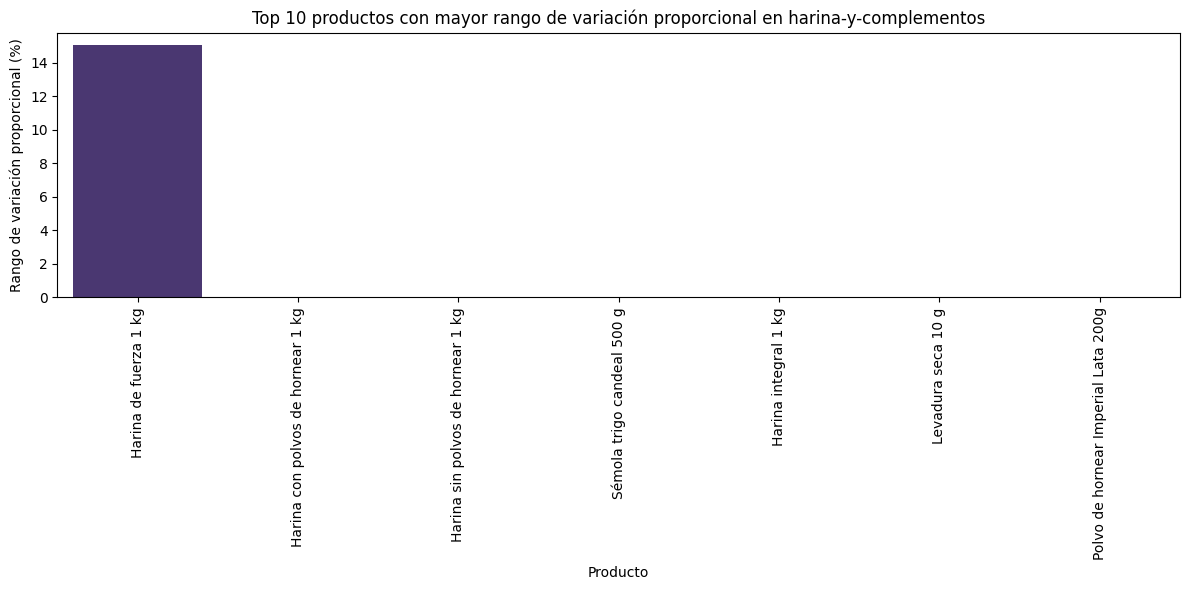

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


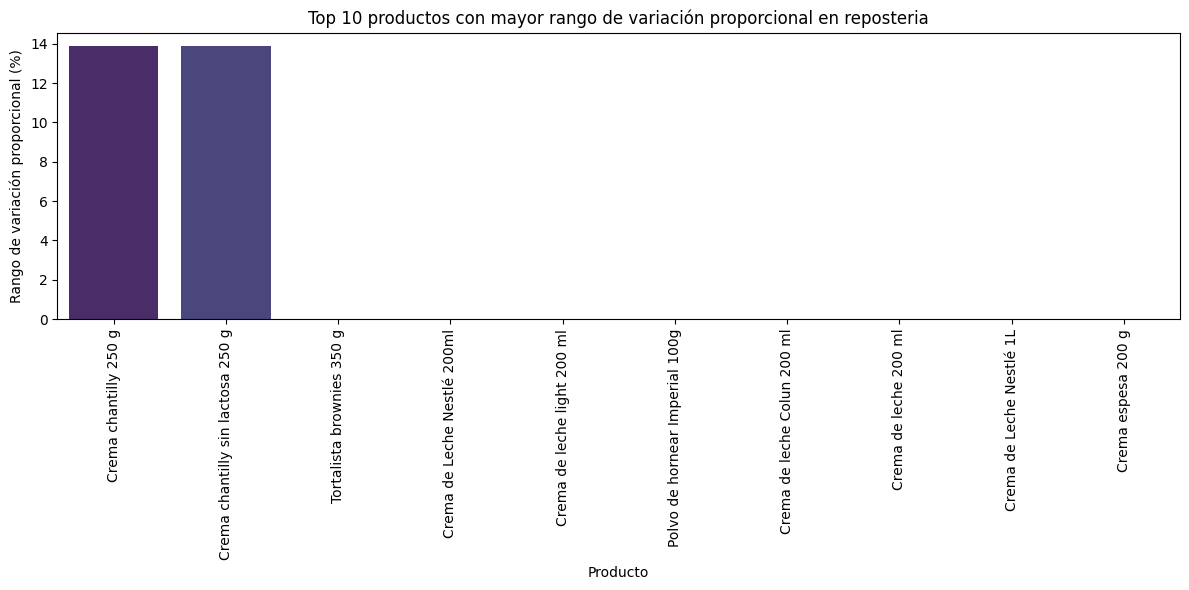

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


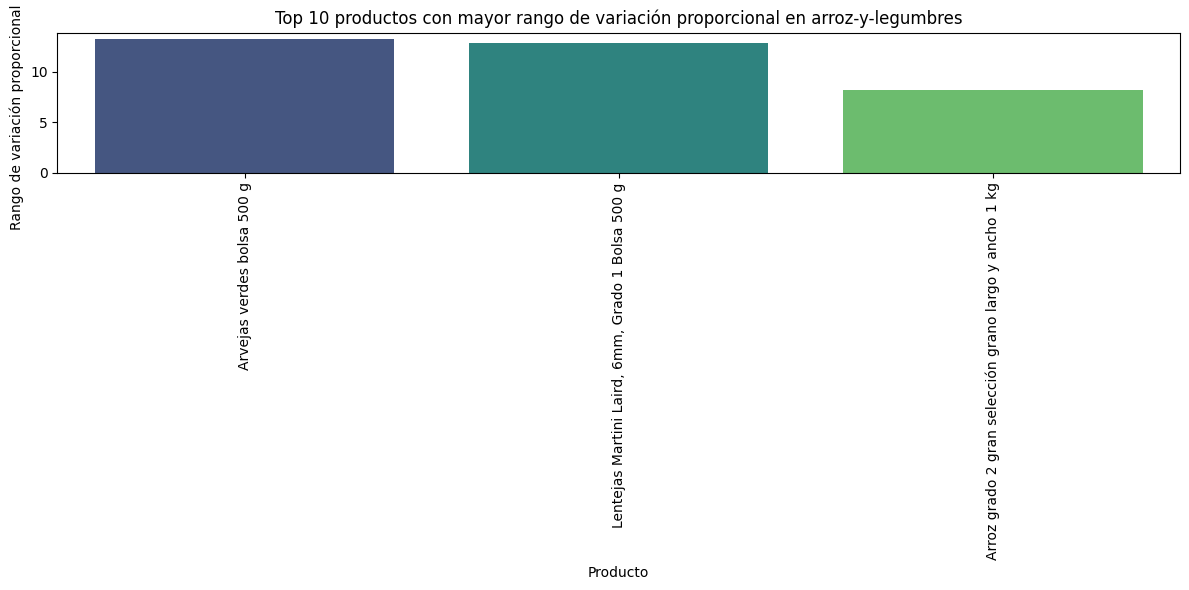

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


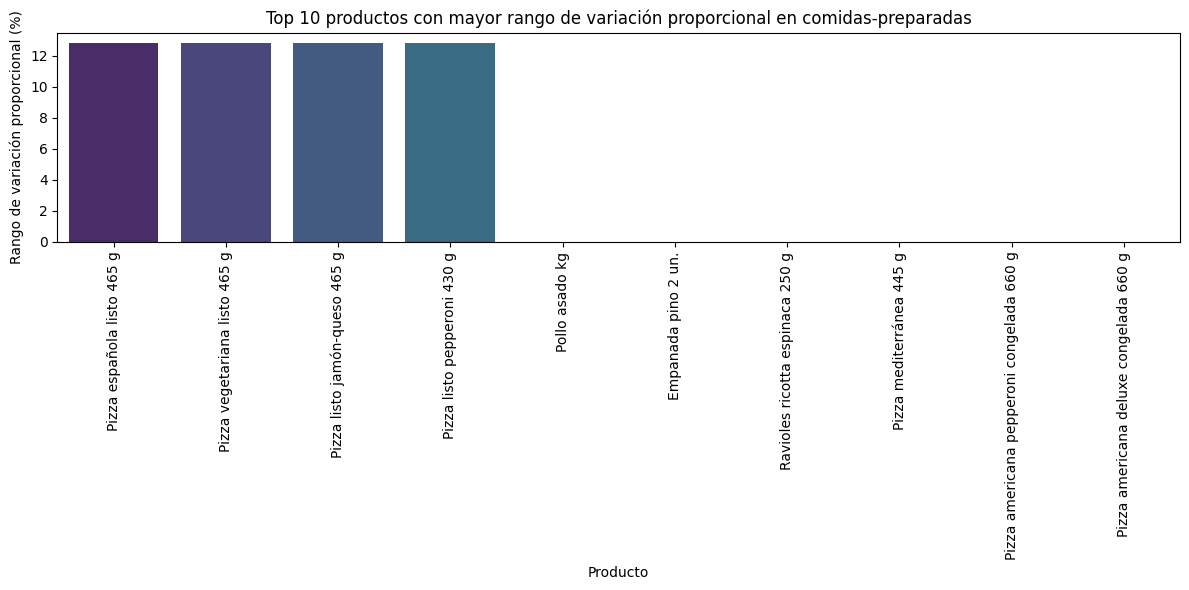

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


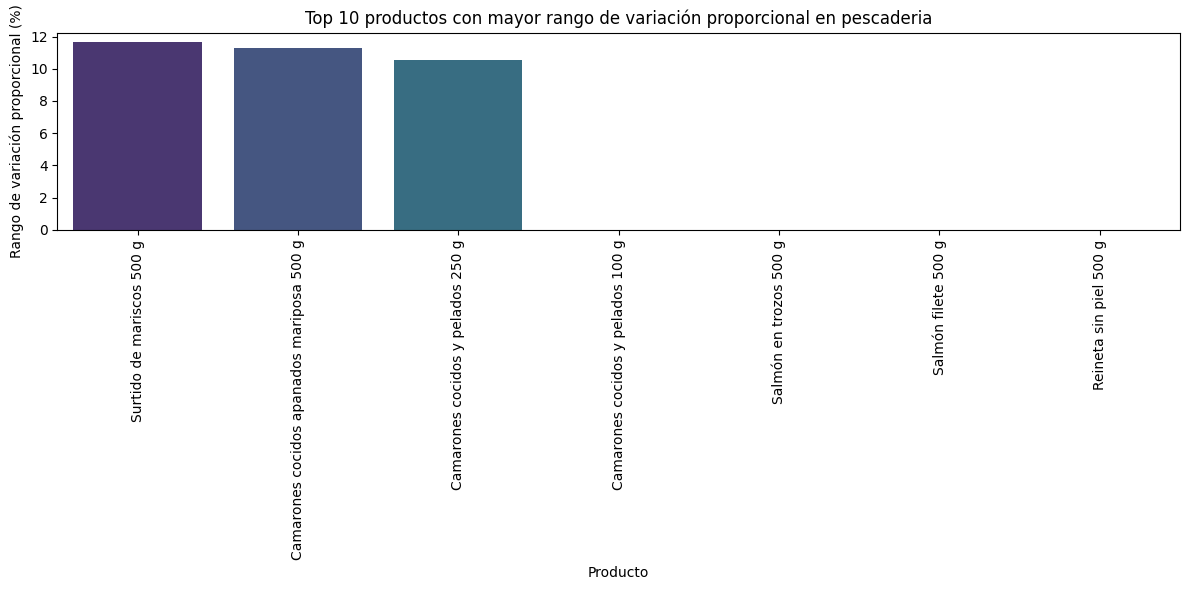

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


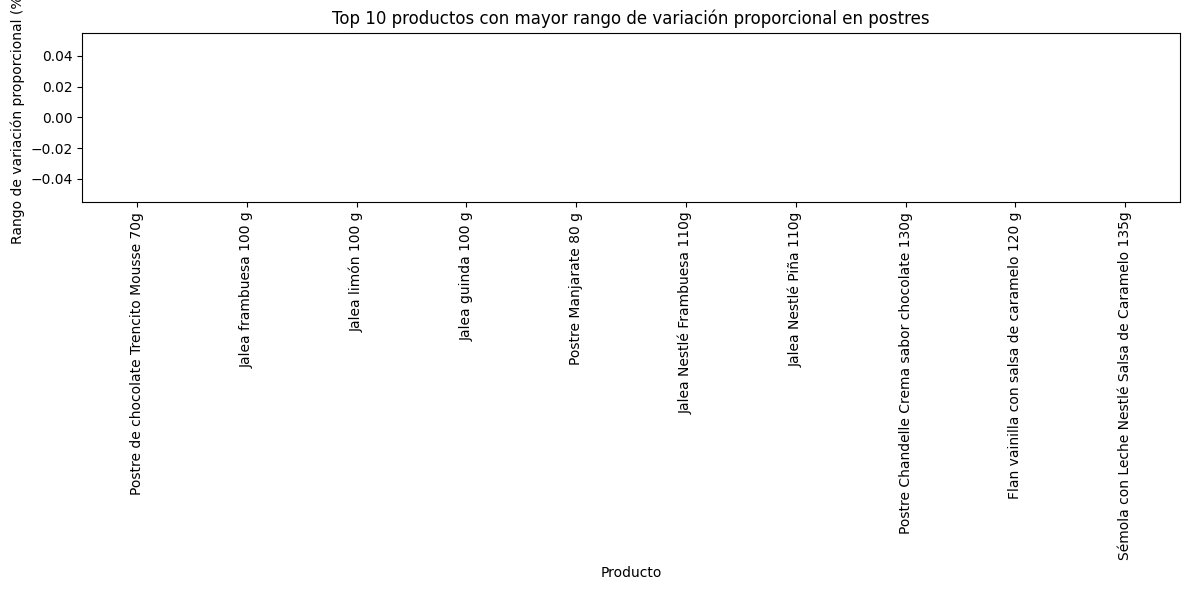

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


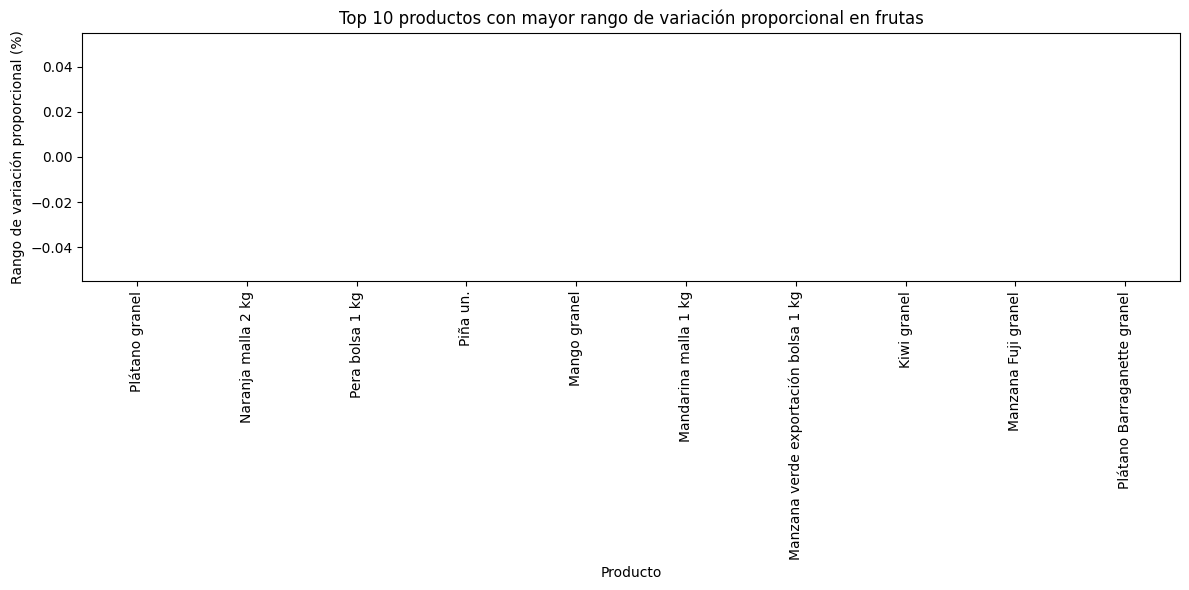

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


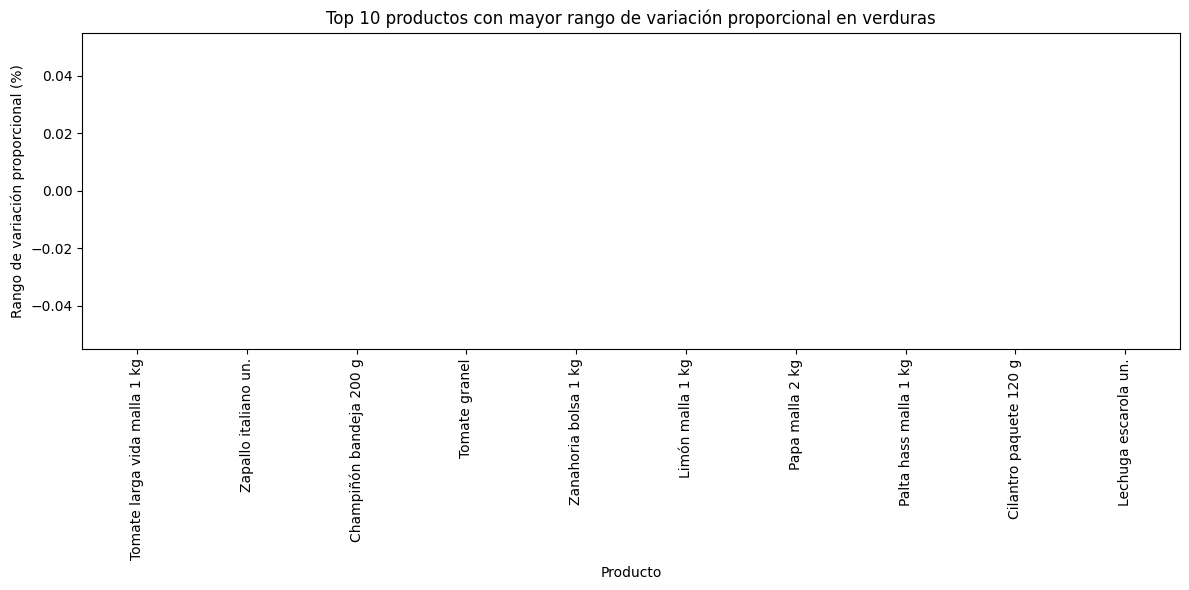

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


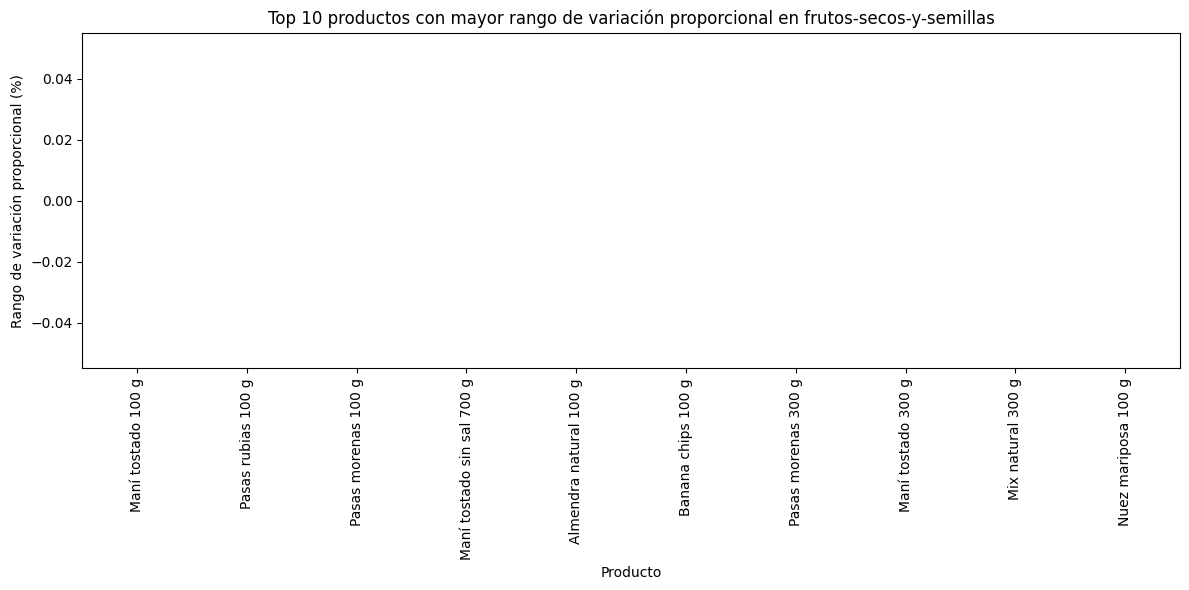

C:\Users\hp\AppData\Local\Temp\ipykernel_13288\2975588447.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')


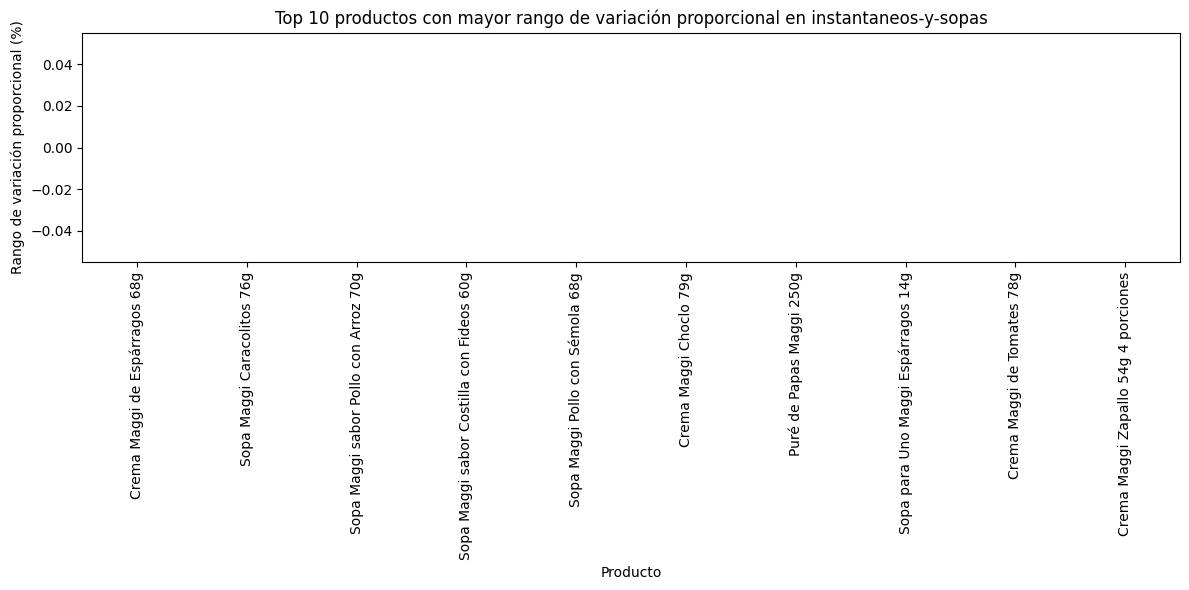

In [141]:
# Gráfico de los rangos de variación proporcional para cada categoría en 'categoria2'
# Aquellos sin variación es debido a que no tienen precios bajos (low_price) ni altos (high_price)
cantidad = 10
categorias = df['categoria2'].unique()
for categoria in categorias:
    plt.figure(figsize=(12, 6))
    df_sorted = df[df['categoria2'] == categoria].sort_values(by='Rango proporcion', ascending=False)
    sns.barplot(x='title', y='Rango proporcion', data=df_sorted.head(cantidad), palette='viridis')
    plt.xticks(rotation=90)
    plt.title(f'Top {cantidad} productos con mayor rango de variación proporcional en {categoria}')
    plt.xlabel('Producto')
    plt.ylabel('Rango de variación proporcional (%)')
    plt.tight_layout()
    plt.show()